# Colab Init

In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'CS6476-CV/2A Linear image processing'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
import numpy as np
import cv2
import os
from skimage.util import random_noise

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


%matplotlib inline
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DRIVE_PATH = "/content/drive/My Drive/Projects"
COURSE_PATH = os.path.join(DRIVE_PATH, FOLDERNAME)
DATA_DIR = os.path.join(COURSE_PATH, "data")

# L2 Filtering

## Load an color image in grayscale


In [4]:
img = cv2.imread(DATA_DIR + '/Saturn.jpg', cv2.IMREAD_GRAYSCALE)

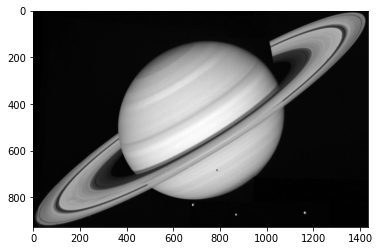

In [5]:
plt.imshow(img, cmap='gray')
plt.show()

## Add noise 

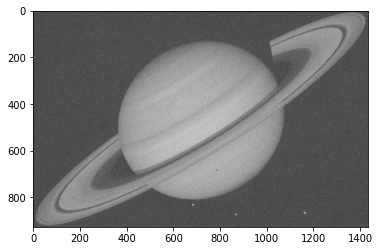

In [6]:
H, W = img.shape 
noise_sigma = 25
noise = np.random.randn(H, W) * 25
noise_img = img + noise
plt.imshow(noise_img, cmap='gray')
plt.show()

## Remove noise with Gaussian Filter

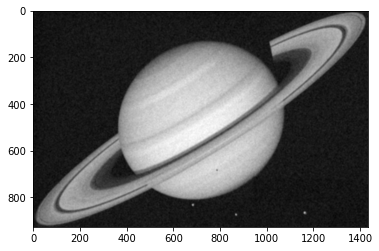

In [7]:
filter_size = 7
filter_sigma = 5
filter = cv2.GaussianBlur(noise_img, (filter_size, filter_size), filter_sigma)
plt.imshow(filter, cmap='gray')
plt.show()

# L3 Linearity and convolution	

## Boundry Issues

### Load Color image

In [8]:
img = cv2.imread(DATA_DIR + '/fall-leaves.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

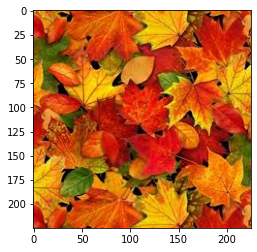

In [9]:
plt.imshow(img)
plt.show()

### Border types

In [10]:
# https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#gaussianblur
border_type = [cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, 
               cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP,
               cv2.BORDER_CONSTANT, cv2.BORDER_DEFAULT]

### Test the borders

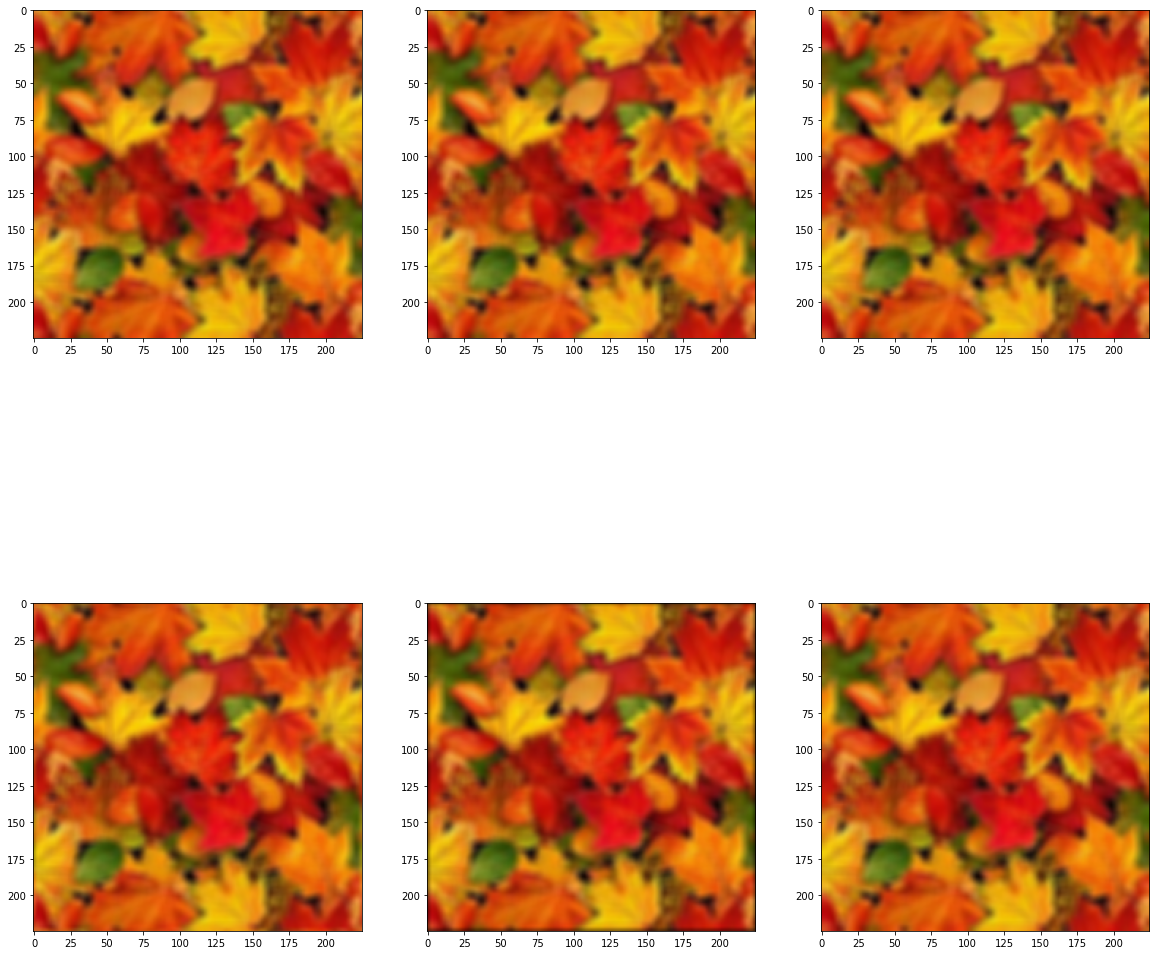

In [11]:


rows = 2
cols = 3
border = 0
f, axarr = plt.subplots(rows,cols, figsize=(20,20))
filter_size = 7
filter_sigma = 3
for i in range(rows):
  for j in range(cols):
    filtered_image = cv2.GaussianBlur(img, (filter_size, filter_size), filter_sigma, borderType=border_type[border])
    axarr[i,j].patch.set_edgecolor('white')  
    axarr[i,j].patch.set_linewidth('10')  
    axarr[i,j].imshow(filtered_image)
    border += 1

plt.show()

## Median Filter

### Load image

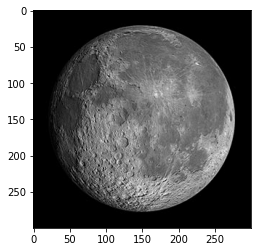

In [32]:
img = cv2.imread(DATA_DIR + '/moon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Add s&p noise

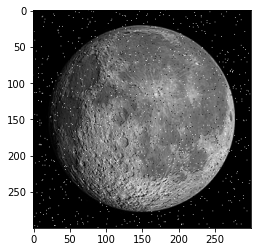

In [33]:
noise_img = random_noise(img, mode='s&p',amount=0.02)
plt.imshow(noise_img, cmap='gray')
plt.show()

### Remove noise with median filter

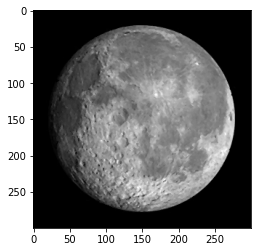

In [41]:
filtered_img = cv2.medianBlur(noise_img.astype('float32'), ksize=3)
plt.imshow(filtered_img, cmap='gray')
plt.show()

# L4 Filters as templates

## Find template 1D

In [54]:
s = [-1, 0, 0, 1, 1, 1, 0, -1, -1, 0, 1, 0, 0, -1]
t = [1, 1, 1, 0, 0]

In [55]:
corr = np.correlate(s, t, "full")
print(np.argmax(corr))
print(np.max(corr))
print(corr)

7
3
[ 0  0 -1 -1 -1  1  2  3  2  0 -2 -2  0  1  1 -1 -1 -1]
